In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
movies_df = pd.read_csv('data/movies.txt', sep='\t', header=None, encoding='latin1')
movies_df.columns = ["Movie Id", "Movie Title", "Unknown", "Action", "Adventure", "Animation", "Childrens", 
                     "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", 
                     "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

In [5]:
movies_df.head()

,Movie Id,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
Y_data = np.loadtxt('data/data.txt').astype(int)
ratings = Y_data[:, 2]
movies = Y_data[:, 1]

In [7]:
def get_ratings(movies, ratings, movie_id):
    r = []
    for i in range(len(movies)):
        if (movies[i] == movie_id):
            r.append(ratings[i])
    return r

In [8]:
movie_dic = {}
for i in range(1682):
    movie_dic[i+1] = get_ratings(movies, ratings, i+1)

In [20]:
genre_ids = [movies_df[movies_df['Comedy'] == 1]["Movie Id"].tolist(), 
            movies_df[movies_df['Romance'] == 1]["Movie Id"].tolist(),
        movies_df[movies_df['Action'] == 1]["Movie Id"].tolist()]

In [22]:
genre_ratings = [[], [], []]
for i in range(3):
    for j in genre_ids[i]:
        genre_ratings[i] += movie_dic[j]
#comedy_ratings = np.asarray(comedy_ratings)

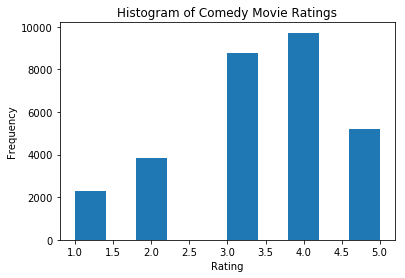

In [23]:
plt.hist(genre_ratings[0])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Comedy Movie Ratings')
plt.show()

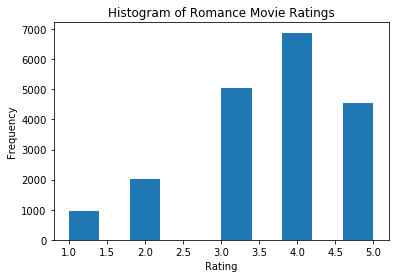

In [24]:
plt.hist(genre_ratings[1])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Romance Movie Ratings')
plt.show()

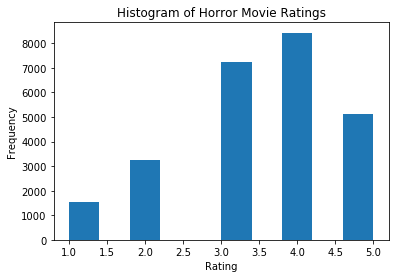

In [27]:
plt.hist(genre_ratings[2])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Horror Movie Ratings')
plt.show()